In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [26]:
# Import data
base_dir = "https://github.com/natsunoyuki/Data_Science/blob/master/gold/gold/gold_price_usd.csv?raw=True"
data = pd.read_csv(base_dir)

# Convert the datetime from str to datetime object.
data["datetime"] = pd.to_datetime(data["datetime"])

In [27]:
# Determine the daily change in gold price.
data["gold_price_change"] = data["gold_price_usd"].diff()

# Restrict the data to later than 2008 Jan 01.
train_data = data[data["datetime"] >= pd.to_datetime("2008-01-01")]

#Use test date between 2007 and 2008
test_data = data[data["datetime"] >= pd.to_datetime("2007-01-01")]
test_data = test_data[test_data["datetime"] <= pd.to_datetime("2008-01-01")]
data.head()

,datetime,gold_price_usd,gold_price_change
0,1978-12-29,137.06,NaN
1,1979-01-01,137.06,0.00
2,1979-01-02,137.29,0.23
3,1979-01-03,134.01,-3.28
4,1979-01-04,136.79,2.78


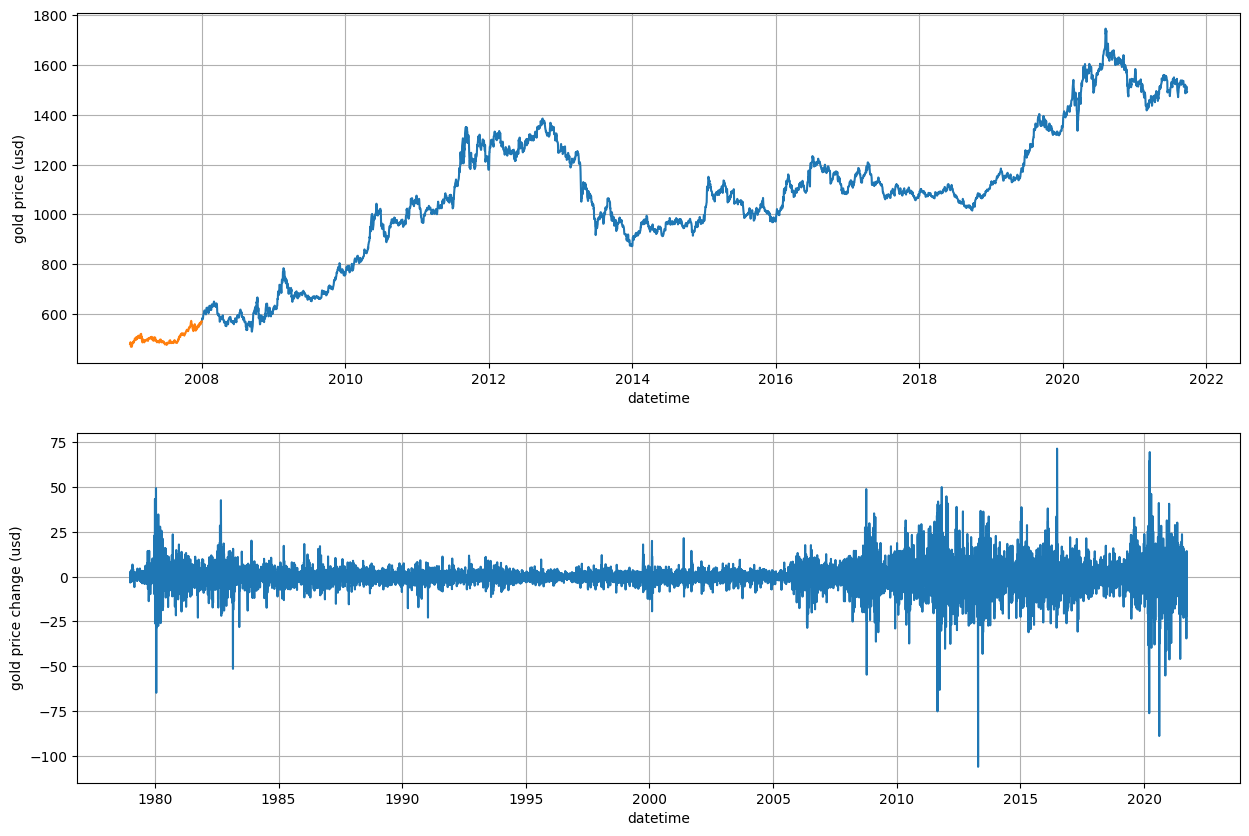

In [28]:
# Plot the daily gold prices as well as the daily change.
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(train_data["datetime"], train_data["gold_price_usd"])
plt.plot(test_data["datetime"], test_data["gold_price_usd"])
plt.xlabel("datetime")
plt.ylabel("gold price (usd)")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(data["datetime"], data["gold_price_change"])
plt.xlabel("datetime")
plt.ylabel("gold price change (usd)")
plt.grid(True)
plt.show()

In [29]:
# Observations are
X = train_data[["gold_price_change"]].values
# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 100, random_state = 42)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

In [30]:
# Take a look at the inital state and transition matrix
print("Initial state distribution: ", model.startprob_)
print("Transition matrix: \n", model.transmat_)

Initial state distribution:  [1.00000000e+000 1.43790272e-014 5.80987121e-122]
Transition matrix: 
 [[3.30771512e-01 6.68575745e-01 6.52742356e-04]
 [5.90534923e-01 3.80506870e-01 2.89582063e-02]
 [6.17560403e-03 5.78934722e-02 9.35930924e-01]]


In [31]:
#Take a look at each state's Gaussian means and covariances
print("Gaussian distribution means:")
print(model.means_ )
print("Gaussian distribution covariances:")
print(model.covars_)

Gaussian distribution means:
[[0.3169978 ]
 [0.08960057]
 [0.50601605]]
Gaussian distribution covariances:
[[[ 21.17952091]]

 [[100.69595551]]

 [[364.3140195 ]]]


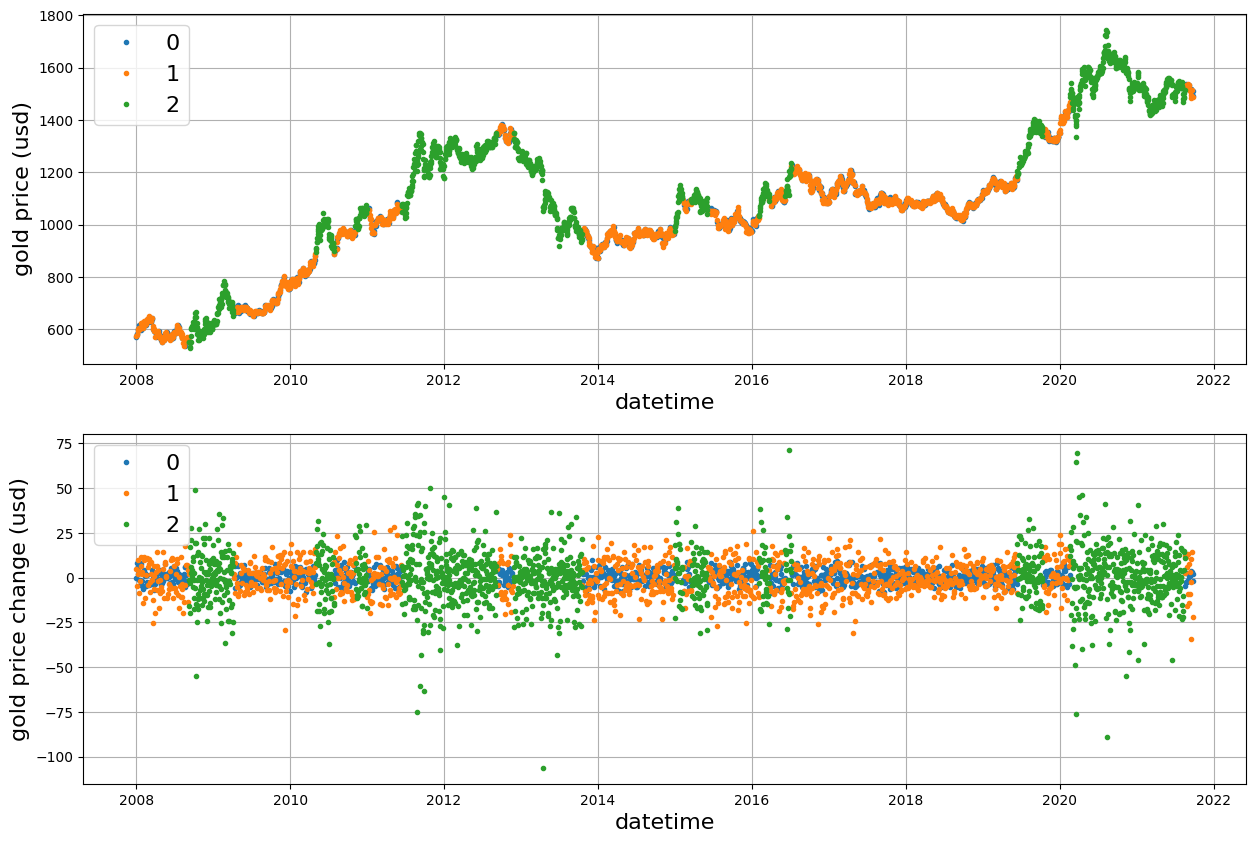

In [33]:
#Plot the 3 different states
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = train_data["datetime"].iloc[want]
    y = train_data["gold_price_usd"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price (usd)", fontsize=16)
plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = train_data["datetime"].iloc[want]
    y = train_data["gold_price_change"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price change (usd)", fontsize=16)
plt.show()

We can now consider that state 0 corresponds to low volatility, state 1 to medium volatility, and state 2 to high volatility.

In [45]:
#Use the Viterbi algorithm to predict the following observation sequence
O = test_data[["gold_price_change"]].values
Z_test = model.predict(O)

states = pd.unique(Z_test)
states

array([0, 1], dtype=int64)

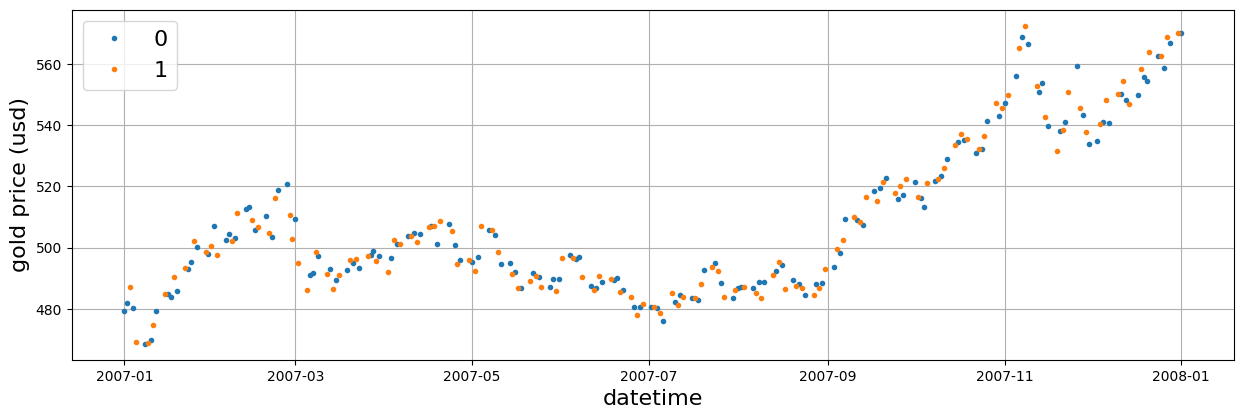

In [46]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in pd.unique(states):
    want = (Z_test == i)
    x = test_data["datetime"].iloc[want]
    y = test_data["gold_price_usd"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price (usd)", fontsize=16)
plt.show()